In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
from src.folder_handler import *
from src.cort_processor import *
from src.cca_processor import *
from src.tdt_support import *
from src.plotter import *
from src.decoders import *
from src.utils import *
import pickle
import scipy as sio
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib.colors import LinearSegmentedColormap
from src.wiener_filter import *
from matplotlib.pyplot import cm
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, LinearRegression
import os
from itertools import cycle, islice
import copy

with open('/home/diya/Documents/rat-fes/data/pickles/N5_171001_proc.pkl', 'rb') as inp: #YOUR PATH HERE
    cp1=pickle.load(inp)
    
with open('/home/diya/Documents/rat-fes/data/pickles/N5_171016_proc.pkl', 'rb') as inp: #YOUR PATH HERE
    cp2=pickle.load(inp)
    
with open('/home/diya/Documents/rat-fes/data/pickles/N5_171130_proc.pkl', 'rb') as inp: #YOUR PATH HERE
    cp3=pickle.load(inp)
    
----

with open('/home/diya/Documents/rat-fes/data/pickles/N6_171026_proc.pkl', 'rb') as inp: #YOUR PATH HERE
    cp1=pickle.load(inp)
    
with open('/home/diya/Documents/rat-fes/data/pickles/N6_171204_proc.pkl', 'rb') as inp: #YOUR PATH HERE
    cp2=pickle.load(inp)
    
with open('/home/diya/Documents/rat-fes/data/pickles/N6_171211_proc.pkl', 'rb') as inp: #YOUR PATH HERE
    cp3=pickle.load(inp)
    
----

with open('/home/diya/Documents/rat-fes/data/pickles/N5_mixed.pkl', 'rb') as inp: #YOUR PATH HERE
    cp1 = pickle.load(inp)
with open('/home/diya/Documents/rat-fes/data/pickles/N6_mixed.pkl', 'rb') as inp: #YOUR PATH HERE
    cp3 = pickle.load(inp)
with open('/home/diya/Documents/rat-fes/data/pickles/N9_mixed.pkl', 'rb') as inp: #YOUR PATH HERE
    cp2 = pickle.load(inp)
    

In [39]:
with open('/home/diya/Documents/rat-fes/data/pickles/N6_171026_proc.pkl', 'rb') as inp: #YOUR PATH HERE
    cp1=pickle.load(inp)
    
with open('/home/diya/Documents/rat-fes/data/pickles/N6_171204_proc.pkl', 'rb') as inp: #YOUR PATH HERE
    cp2=pickle.load(inp)
    
with open('/home/diya/Documents/rat-fes/data/pickles/N6_171211_proc.pkl', 'rb') as inp: #YOUR PATH HERE
    cp3=pickle.load(inp)

In [40]:
day0_decoder, vaffy, test_x, test_y = cp1.decode_angles(metric=1)
print(np.average(vaffy,1)[1])

0.24899999999999997


In [41]:
cca_1 = CCAProcessor(cp1, cp2)
cca_2 = CCAProcessor(cp1, cp3)

(11951,)
(12023,)
should be good to align
(7249, 18)
(7249, 5)
(7249, 18)
(7249, 5)
(11951,)
(12031,)
should be good to align
(8085, 18)
(8085, 5)
(8085, 18)
(8085, 5)


In [42]:
cp_list = [cp1, cp2, cp3]
cca_list = [cca_1, cca_2]

In [43]:
fixed_vaf=[]
same_vaf = []
for cp in cp_list:
    nada, temp_vaf, nadas, nadax = cp.decode_angles(metric=1)
    same_vaf.append(np.average(temp_vaf, 1)[1])
    temp_x = cp.data['rates'][0]
    temp_y = cp.data['angles'][0]
    temp_x_format, temp_y_format = format_data(temp_x, temp_y)
    nada, temp_vaf, nadas, nadax = decode_kfolds(temp_x_format, temp_y_format, metric=1, preset_h = day0_decoder)
    fixed_vaf.append(np.average(temp_vaf, 1)[1])


In [44]:
cca_vaf = []
for cca_obj in cca_list:
    cca_transformer, nada = cca_obj.apply_CCA(pca=False)
    test_x = cca_obj.cp2.data['rates'][0]
    test_y = cca_obj.cp2.data['angles'][0]
    
    trans_x = cca_obj.quick_cca(test_x, cca_transformer, scale=False)
    
    trans_x_format, test_y_format = format_data(trans_x, test_y)
    nada, temp_vaf, nads, nadax = decode_kfolds(trans_x_format, test_y_format, metric=1, preset_h=day0_decoder)
    cca_vaf.append(np.average(temp_vaf, 1)[1])

dim0 corr is 0.55
dim1 corr is 0.37
dim2 corr is 0.32
dim0 corr is 0.58
dim1 corr is 0.44
dim2 corr is 0.26


In [45]:
cca_vaf

[0.20800000000000002, 0.399]

In [46]:
fixed_vaf

[0.29000000000000004, 0.194, 0.32599999999999996]

In [47]:
len(fixed_vaf)

3

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
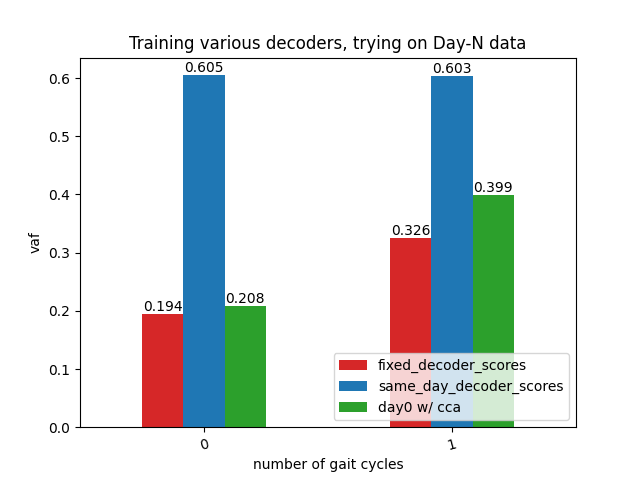

In [48]:
%matplotlib widget
%matplotlib widget

plot_dict = {}
plot_dict['fixed_decoder_scores'] = fixed_vaf[1:]
plot_dict['same_day_decoder_scores'] = same_vaf[1:]
plot_dict['day0 w/ cca'] = cca_vaf

index = np.arange(2)
df = pd.DataFrame(data=plot_dict, index=index)

#my_colors = list(islice(cycle(['tab:red','tab:blue', 'tab:green' 'k']), None, len(df)))

  
# plot grouped bar chart
ax = df.plot.bar(rot=15, color=['tab:red', 'tab:blue', 'tab:green'])
#ax.set_ylim(bottom=-1, top=1)
ax.set_title('Training various decoders, trying on Day-N data')
ax.set_ylabel('vaf')
ax.set_xlabel('number of gait cycles')
ax.legend(loc='lower right')
for container in ax.containers:
    diya = ax.bar_label(container)